In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hp-lenovo-acer-asus-samsung-companies-share-prices/Lenovo share prices (2000-2023).csv
/kaggle/input/hp-lenovo-acer-asus-samsung-companies-share-prices/HP share prices (1962-2023).csv


In [2]:
df_lenovo = pd.read_csv("/kaggle/input/hp-lenovo-acer-asus-samsung-companies-share-prices/Lenovo share prices (2000-2023).csv")
df_hp = pd.read_csv("/kaggle/input/hp-lenovo-acer-asus-samsung-companies-share-prices/HP share prices (1962-2023).csv")

In [3]:
df_lenovo.shape, df_hp.shape

((5764, 7), (15430, 7))

Let's use the lenovo data for the final testing set and see if the model we train abstracts well

(array([[<AxesSubplot: title={'center': 'Open'}>,
         <AxesSubplot: title={'center': 'High'}>],
        [<AxesSubplot: title={'center': 'Low'}>,
         <AxesSubplot: title={'center': 'Close'}>],
        [<AxesSubplot: title={'center': 'Adj Close'}>,
         <AxesSubplot: title={'center': 'Volume'}>]], dtype=object),
 array([[<AxesSubplot: title={'center': 'Open'}>,
         <AxesSubplot: title={'center': 'High'}>],
        [<AxesSubplot: title={'center': 'Low'}>,
         <AxesSubplot: title={'center': 'Close'}>],
        [<AxesSubplot: title={'center': 'Adj Close'}>,
         <AxesSubplot: title={'center': 'Volume'}>]], dtype=object))

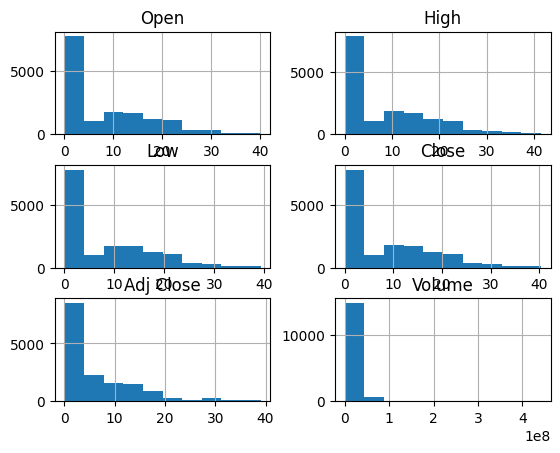

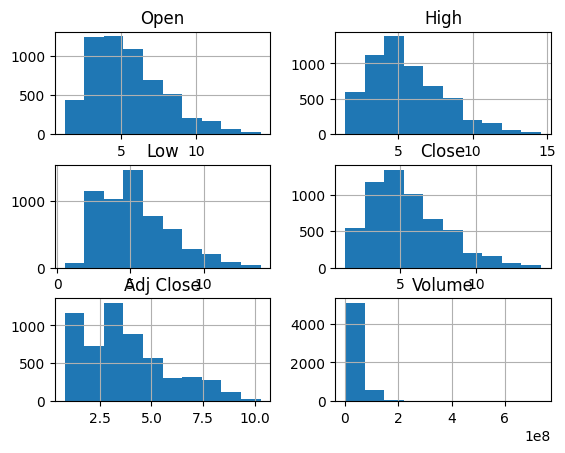

In [4]:
df_hp.hist(), df_lenovo.hist()

The datasets seem to have similar overall distributions

In [5]:
# We want to use the previous day's price data to predict the price on the next day

copy = df_hp

temp = copy['Close'][1::]

copy = copy[0:copy.shape[0] - 1]

copy['Close'] = temp.values

/tmp/ipykernel_20/4169336300.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy['Close'] = temp.values


In [6]:
for col in copy:
    if copy[col].dtype == "object":
        copy[col] = copy[col].factorize()[0]

/tmp/ipykernel_20/3605472749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy[col] = copy[col].factorize()[0]


In [7]:
df_hp = copy

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df_hp.loc[:,df_hp.columns != "Close"], df_hp["Close"], test_size=0.3)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
# Base Model: Linear Regression

from sklearn.linear_model import LinearRegression
from math import sqrt

reg = LinearRegression().fit(X_train, y_train)

preds = reg.predict(X_valid)

RMSE = 0

for i, entry in enumerate(preds):
    RMSE += abs(entry - y_valid.iloc[i])**2
    
RMSE = sqrt(RMSE / y_valid.shape[0])

print(RMSE)

0.30901688341918904


In [10]:
# Try Using Catboost Regressor

from catboost import CatBoostRegressor

model = CatBoostRegressor(loss_function='RMSE')

model.fit(X_train, y_train)

pred = model.predict(X_valid)

RMSE = 0

for i, entry in enumerate(preds):
    RMSE += abs(entry - y_valid.iloc[i])**2
    
RMSE = sqrt(RMSE / y_valid.shape[0])

print(RMSE)

Learning rate set to 0.059629
0:	learn: 8.3993726	total: 62ms	remaining: 1m 1s
1:	learn: 7.9233123	total: 65.3ms	remaining: 32.6s
2:	learn: 7.4676005	total: 68.5ms	remaining: 22.8s
3:	learn: 7.0441272	total: 71.7ms	remaining: 17.9s
4:	learn: 6.6384195	total: 75ms	remaining: 14.9s
5:	learn: 6.2600916	total: 78.1ms	remaining: 12.9s
6:	learn: 5.9087665	total: 81.2ms	remaining: 11.5s
7:	learn: 5.5738127	total: 84.4ms	remaining: 10.5s
8:	learn: 5.2607404	total: 87.6ms	remaining: 9.64s
9:	learn: 4.9635668	total: 90.8ms	remaining: 8.98s
10:	learn: 4.6817169	total: 93.9ms	remaining: 8.45s
11:	learn: 4.4153841	total: 97.1ms	remaining: 8s
12:	learn: 4.1699862	total: 100ms	remaining: 7.62s
13:	learn: 3.9327579	total: 104ms	remaining: 7.29s
14:	learn: 3.7128657	total: 107ms	remaining: 7s
15:	learn: 3.5062166	total: 110ms	remaining: 6.74s
16:	learn: 3.3099499	total: 113ms	remaining: 6.51s
17:	learn: 3.1257695	total: 116ms	remaining: 6.32s
18:	learn: 2.9524400	total: 119ms	remaining: 6.14s
19:	learn